# EXPLORATORY DATA ANALYSIS

This is an Data Analysis EDA Project where we use the income_census dataset from https://www.kaggle.com/competitions/census-income/data to see which features can increase one's chance of earning >50k. The following steps would be taken:

Importing the necessary libraries
Big picture view of the data
Missing values
Dependent variable (income)
Independent variables
Other relationships (if necesary)
Conclusion

## 1)  IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
dataset = pd.read_csv('income_census.csv', na_values= "?")

## 2) THE BIG PICTURE OF THE DATA

In [11]:
dataset.head(n=10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K


In [5]:
dataset.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
dataset.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
dataset.shape

# .shape returns the number of rows and columns of a dataframe or numpy array 

(32561, 15)

In [14]:
dataset.nunique()

#The nunique() function is used in Python's pandas library to count the number of unique values in each column of a DataFrame.It returns a Series object containing the count of distinct values for each column.

age                  73
workclass             8
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           14
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       41
income                2
dtype: int64

## 3) MISSING VALUES

In [15]:
dataset.isna().any()
#the isna() function is used to check for missing or null values in a DataFrame or Series. When followed by the any() function, it checks whether there are any missing values in each column of the DataFrame and returns a Series indicating the presence of missing values.

age               False
workclass          True
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation         True
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country     True
income            False
dtype: bool

In [16]:
dataset.describe()
#count can also assist in identifying anomalise in data thus indicating the presence of misssing values 

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## 4) DEPENDENT VARIABLES 

### 4.1) INCOME

In [25]:
dataset.groupby('income').size()

income
<=50K    24720
>50K      7841
dtype: int64

In [33]:
dataset.groupby('income')['age'].count()/len(dataset)

income
<=50K    0.75919
>50K     0.24081
Name: age, dtype: float64

<AxesSubplot:xlabel='income', ylabel='count'>

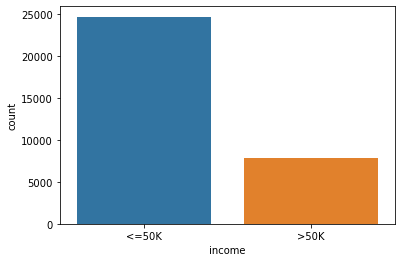

In [30]:
sns.countplot(x = 'income', data = dataset)

## 5) INDEPENDENT VARIABLES

## 5.1) AGE

In [42]:
dataset.age.describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age'>

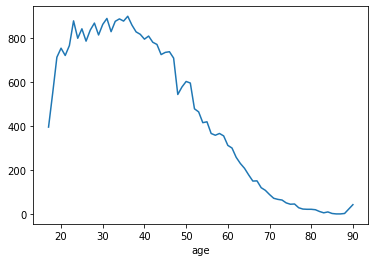

In [47]:
dataset.groupby('age').size().plot()

<AxesSubplot:xlabel='age', ylabel='count'>

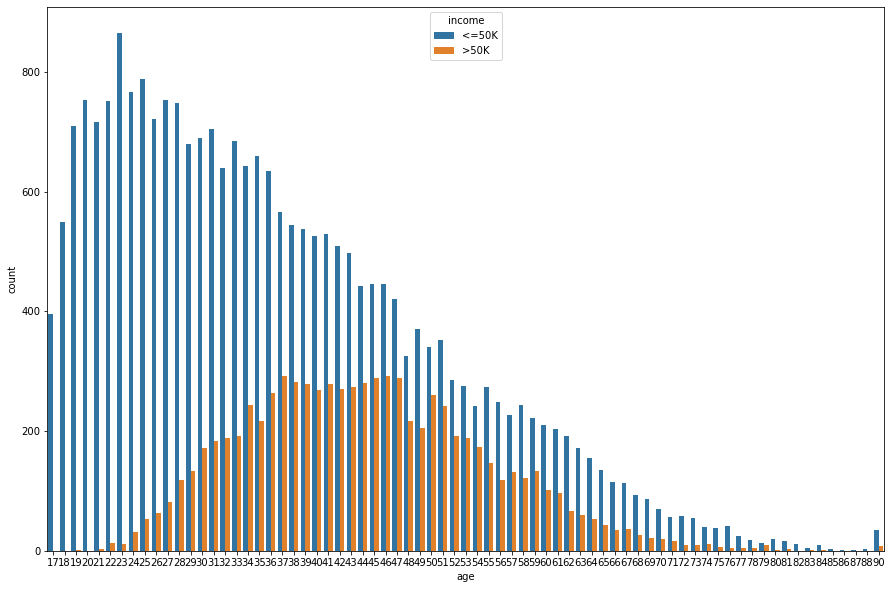

In [56]:
plt.figure(figsize= (15,10))
sns.countplot(x= 'age', hue = 'income', data = dataset)

## 5.2) HOURS PER WEEK

<AxesSubplot:xlabel='hours.per.week'>

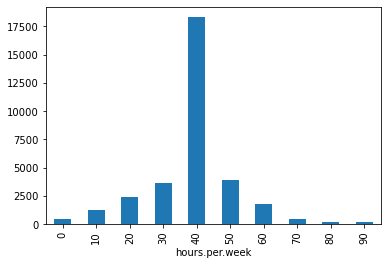

In [67]:
dataset.groupby(dataset['hours.per.week']//10*10)['income'].size().plot(kind='bar')

In [68]:
dataset['hours.per.week2'] = np.where(dataset['hours.per.week']< 40,'below 40','40 and above')
dataset

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,hours.per.week2
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K,40 and above
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,below 40
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K,40 and above
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,40 and above
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,40 and above
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,40 and above
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,below 40
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,40 and above
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,40 and above


<AxesSubplot:xlabel='hours.per.week2', ylabel='count'>

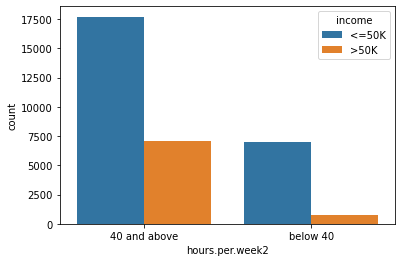

In [69]:
sns.countplot(x = 'hours.per.week2', hue = 'income', data = dataset)

## 5.3) SEX

<AxesSubplot:xlabel='sex'>

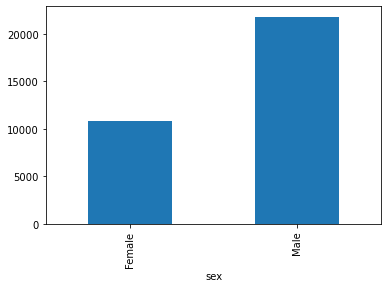

In [70]:
dataset.groupby('sex').size().plot(kind= "bar")

## 5.4) MARITAL STATUS 

In [80]:
dataset['marital.status'].describe()

count                  32561
unique                     7
top       Married-civ-spouse
freq                   14976
Name: marital.status, dtype: object

<AxesSubplot:xlabel='marital.status'>

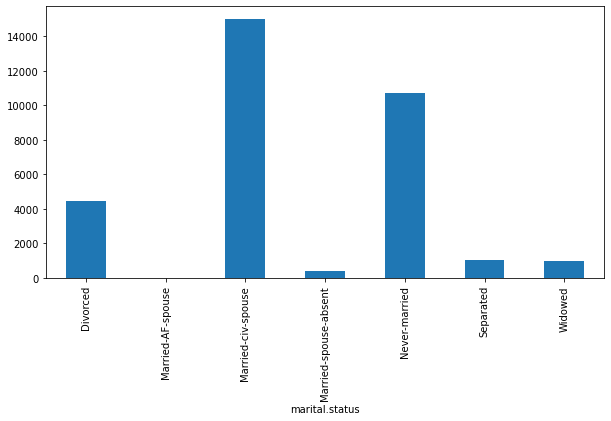

In [82]:
plt.figure(figsize= (10,5))
dataset.groupby('marital.status').size().plot(kind= "bar")

<AxesSubplot:ylabel='None'>

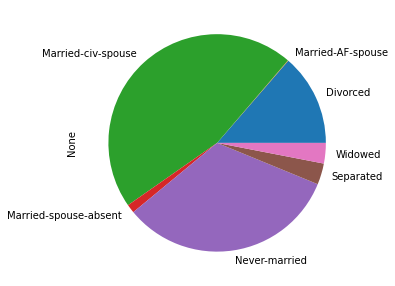

In [91]:
plt.figure(figsize= (10,5))
dataset.groupby('marital.status').size().plot(kind= "pie")

## 5.5) OCCUPATION 

In [93]:
dataset.occupation.describe()

count              30718
unique                14
top       Prof-specialty
freq                4140
Name: occupation, dtype: object

<AxesSubplot:ylabel='None'>

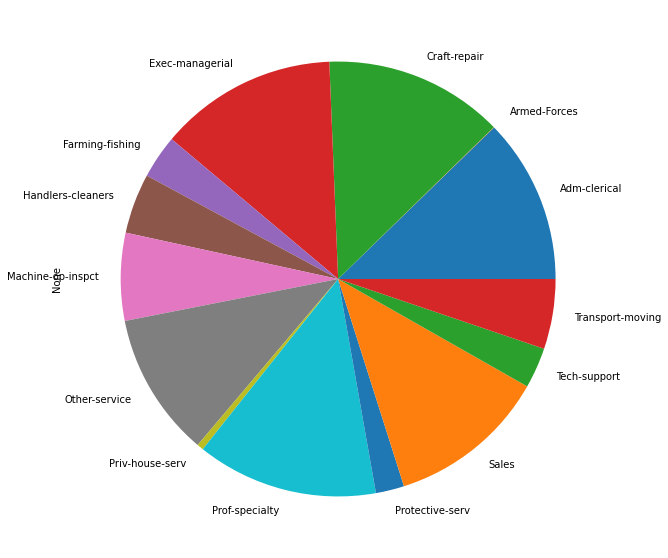

In [97]:
plt.figure(figsize= (20,10))
dataset.groupby('occupation').size().plot(kind= 'pie')

<AxesSubplot:ylabel='None'>

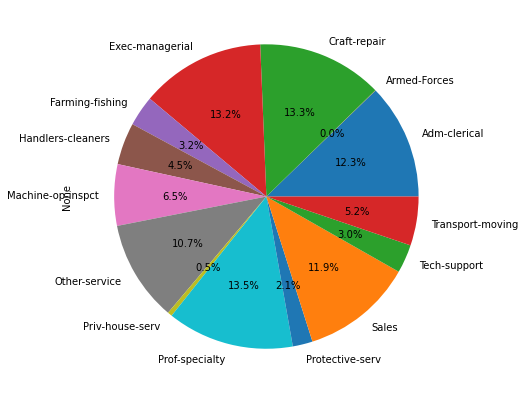

In [101]:
plt.figure(figsize= (17,7))
dataset.groupby('occupation').size().plot(kind='pie', autopct='%1.1f%%')

# 6) OTHER RELATIONSHIPS

AGE AND CAPITAL LOSS   : correlation

In [102]:
dataset.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [103]:
dataset['age'].corr(dataset['capital.loss'])

0.05777453947897468

Text(0.5, 1.0, 'Correlation: Age vs capital.loss')

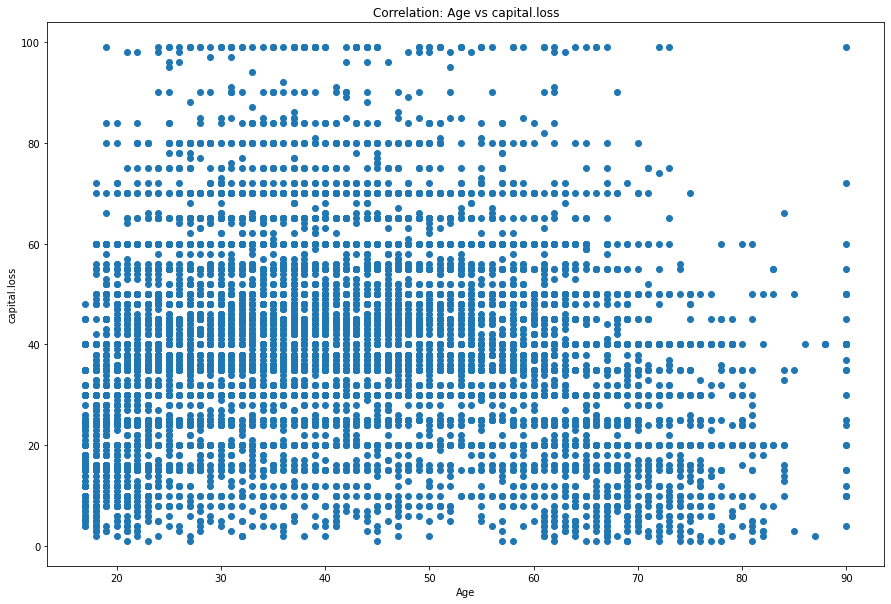

In [105]:
plt.figure(figsize= (15,10))

x = dataset['age']
y = dataset['hours.per.week']

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('capital.loss')
plt.title('Correlation: Age vs capital.loss')

###In the context of a correlation coefficient of 0.05, it suggests positive correlation. However, the magnitude of 0.05 indicates a relatively weak correlation. This is also clear on how data points have been spread as indicated in the figure above 

# 7) CONCLUSION 

The dataset consists of 32,561 entries and 15 columns.
The dataset contains both numerical and categorical variables.

The dataset contains missing values, indicated by NaN values in the "workclass," "occupation," and "native.country" columns

The "income" column is the dependent variable, which indicates whether a person earns more than 50k or not. It has two categories: "<=50K" and ">50K".The majority of individuals in the dataset (75.92%) earn less than or equal to 50k, while a minority (24.08%) earn more than 50k.

The "age" variable ranges from 17 to 90, with a mean age of 38.58. The age distribution shows a higher concentration of individuals in the age range of 20 to 50.

The "hours.per.week" variable indicates the number of hours worked per week. It ranges from 1 to 99, with an average of 40.44 hours. Most individuals work around 40 hours per week

On relationships between variables we measured wheather there is correlation between age and capital loss. A value of 0.05 indicated a positive but relatively week correlation between age and capita loss